<a href="https://colab.research.google.com/github/yohe4274/2020SpringSeminar/blob/master/YOLOv3FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Refarences

https://eng-memo.info/blog/yolo-original-dataset/

### Colab mount Google Drive 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Git clone Yohei(NAIST ubi) repository

In [0]:
%%bash
# git clone https://github.com/yohe4274/JapaneseObjectDetection.git
git clone https://github.com/yohe4274/JapaneseObjectDetection-AlexeyAB.git
# cd JapaneseObjectDetection
cd JapaneseObjectDetection-AlexeyAB
make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/dark_cuda.c -o obj/dark_cuda.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convoluti

fatal: destination path 'JapaneseObjectDetection-AlexeyAB' already exists and is not an empty directory.
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:247:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/gemm.c: In function ‘convolution_2d’:
./src/gemm.c:2039:15: warning: unused variable ‘out_w’ [-Wunused-variable]
     const int out_w = (w + 2 * pad - ksize) / stride + 1;    // output_width=input_width for stride=1 and pad=1
               ^~~~~
./src/gemm.c:2038:15: warning: unused variable ‘out_h’ [-Wunused-variable]
     const int out_h = (h + 2 * pad - ksize) / stride + 1;    // output_height=input_height for stride=1 and pad=1
               ^~~~~
./src/convolutional_layer.c: In function ‘resize_convolutional_layer’:
./src/convolutional_layer.c:751:9: warning: unused variable ‘old_h’ [-Wunused-variable]
     int old_h = l->h;
     

In [0]:
!ls

gdrive			 JapaneseObjectDetection-AlexeyAB  sample_data
JapaneseObjectDetection  log


### Download YOLOv3 weight pretrained imagenet

In [0]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-01-16 10:14:11--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  49.9MB/s    in 3.1s    

2020-01-16 10:14:14 (49.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



### Training(Fine Tuning)

In [0]:
%%bash
# cd ./JapaneseObjectDetection/
cd ./JapaneseObjectDetection-AlexeyAB/
./darknet detector \
        train \
        cfg/JapaneseObject.data \
        cfg/JapaneseObject-frozen.cfg \
        /content/darknet53.conv.74 > /content/log
        # /content/darknet53.conv.74 > train_log.txt

 OpenCV isn't used 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 BF
   9 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
  10 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8,  wt = 0, wn = 0, o

### copy weight file to Dirve

In [0]:
!ls

JapaneseObjectDetection  log  sample_data


In [0]:
!cp log /content/gdrive/My\ Drive/InternshipDerick/

In [0]:
%cp JapaneseObjectDetection/backup/JapaneseObject-* /content/gdrive/My\ Drive/InternshipDerick/

### Test DriveRecoderImage

threshに指定する値で画像に出力する識別結果を制限できる。
0.1を指定した場合は「そのクラスである確率は10%以上」

In [0]:
!ls

backup	   include		     LICENSE.fuck  Makefile	    results
cfg	   JapaneseObject-test.txt   LICENSE.gen   obj		    scripts
darknet    JapaneseObject-train.txt  LICENSE.gpl   output1.png	    src
data	   libdarknet.a		     LICENSE.meta  predictions.jpg
divide.py  libdarknet.so	     LICENSE.mit   python
examples   LICENSE		     LICENSE.v1    README.md


In [0]:
# %%bash
# cd ./JapaneseObjectDetection
!./darknet detector test cfg/JapaneseObject.data cfg/JapaneseObject.cfg /content/gdrive/My\ Drive/InternshipDerick/JapaneseObject-frozen_final.weights /content/gdrive/My\ Drive/InternshipDerick/test_torii.png -thresh 0.5

/bin/bash: ./darknet: No such file or directory


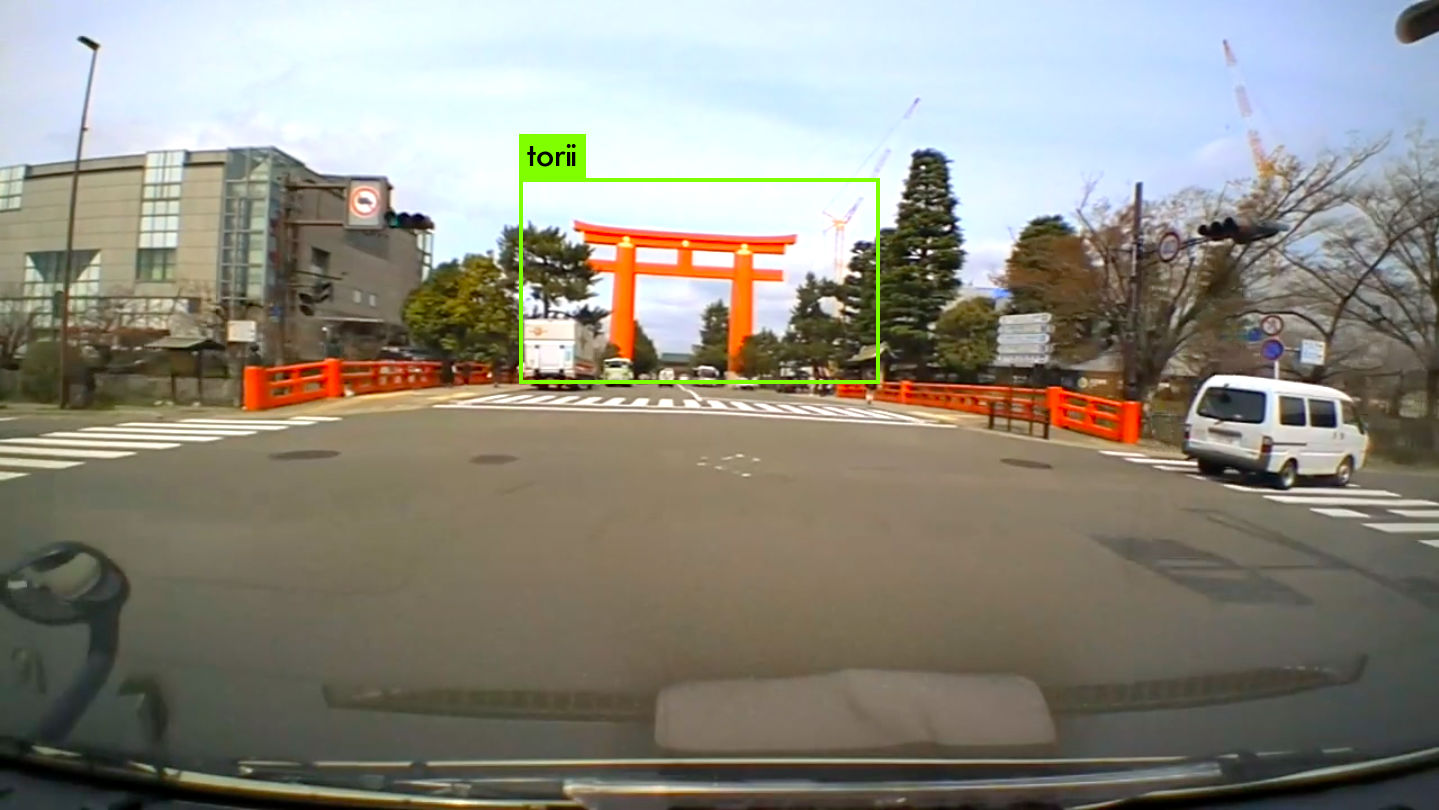

In [0]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('JapaneseObjectDetection/predictions.jpg'))

### Apply YOLOv3 to each images

In [0]:
import os
import glob
import shutil

direct='/content/gdrive/My Drive/InternshipDerick/data/*'
new_dir_path='/content/gdrive/My Drive/InternshipDerick/output'
os.makedirs(new_dir_path, exist_ok=True)


files = glob.glob(direct)
direct = direct.replace(" ","\s")
os.chdir("JapaneseObjectDetection") 

for i, file in enumerate(files):
    file = "\""+file+"\""


    !./darknet detector test cfg/JapaneseObject.data cfg/JapaneseObject.cfg /content/gdrive/My\ Drive/InternshipDerick/JapaneseObject-frozen_final.weights $file -thresh 0.5
    
    path1="predictions.jpg"
    file = file.replace("\"", "")
    path2 = "/content/gdrive/My Drive/InternshipDerick/output/"+os.path.basename(file)
   
    # print(path2)
         
    shutil.move(path1, path2)

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [0]:
!ls

gdrive	sample_data


In [0]:
import os
# os.chdir("gdrive/My Drive/InternshipDerick/") 
!ls
!bash videos2frames.sh

data				   JapaneseObject-frozen_900.weights
JapaneseObject-frozen_100.weights  JapaneseObject-frozen.backup
JapaneseObject-frozen_200.weights  JapaneseObject-frozen_final.weights
JapaneseObject-frozen_300.weights  original.mp4
JapaneseObject-frozen_400.weights  output
JapaneseObject-frozen_500.weights  test_torii.png
JapaneseObject-frozen_600.weights  videos2frames.sh
JapaneseObject-frozen_700.weights  YOLOv3FineTuning.ipynb
JapaneseObject-frozen_800.weights
videos2frames.sh: line 6: $'\nThis script decompose a video into frames\nHow to use: replace path_to_videos and path_to_frames with real paths\n': command not found
Processing /content/gdrive/My Drive/InternshipDerick/original.mp4 file...
original.mp4
/content/gdrive/My Drive/InternshipDerick/original.mp4
original
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdi